Imports and data file loading

In [ ]:
# Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import matplotlib.colors as mcolors
import random

         Year  Period life expectancy
count   178.0              178.000000
mean   2019.0               73.047554
std       0.0                7.519209
min    2019.0               52.910400
25%    2019.0               67.201625
50%    2019.0               74.249200
75%    2019.0               78.720525
max    2019.0               85.273500
         Year  GDP per capita (output, multiple price benchmarks)
count   178.0                                         178.000000 
mean   2019.0                                       22053.922122 
std       0.0                                       21675.777270 
min    2019.0                                         790.046000 
25%    2019.0                                        5471.652725 
50%    2019.0                                       14359.147000 
75%    2019.0                                       31622.840750 
max    2019.0                                      114100.810000 


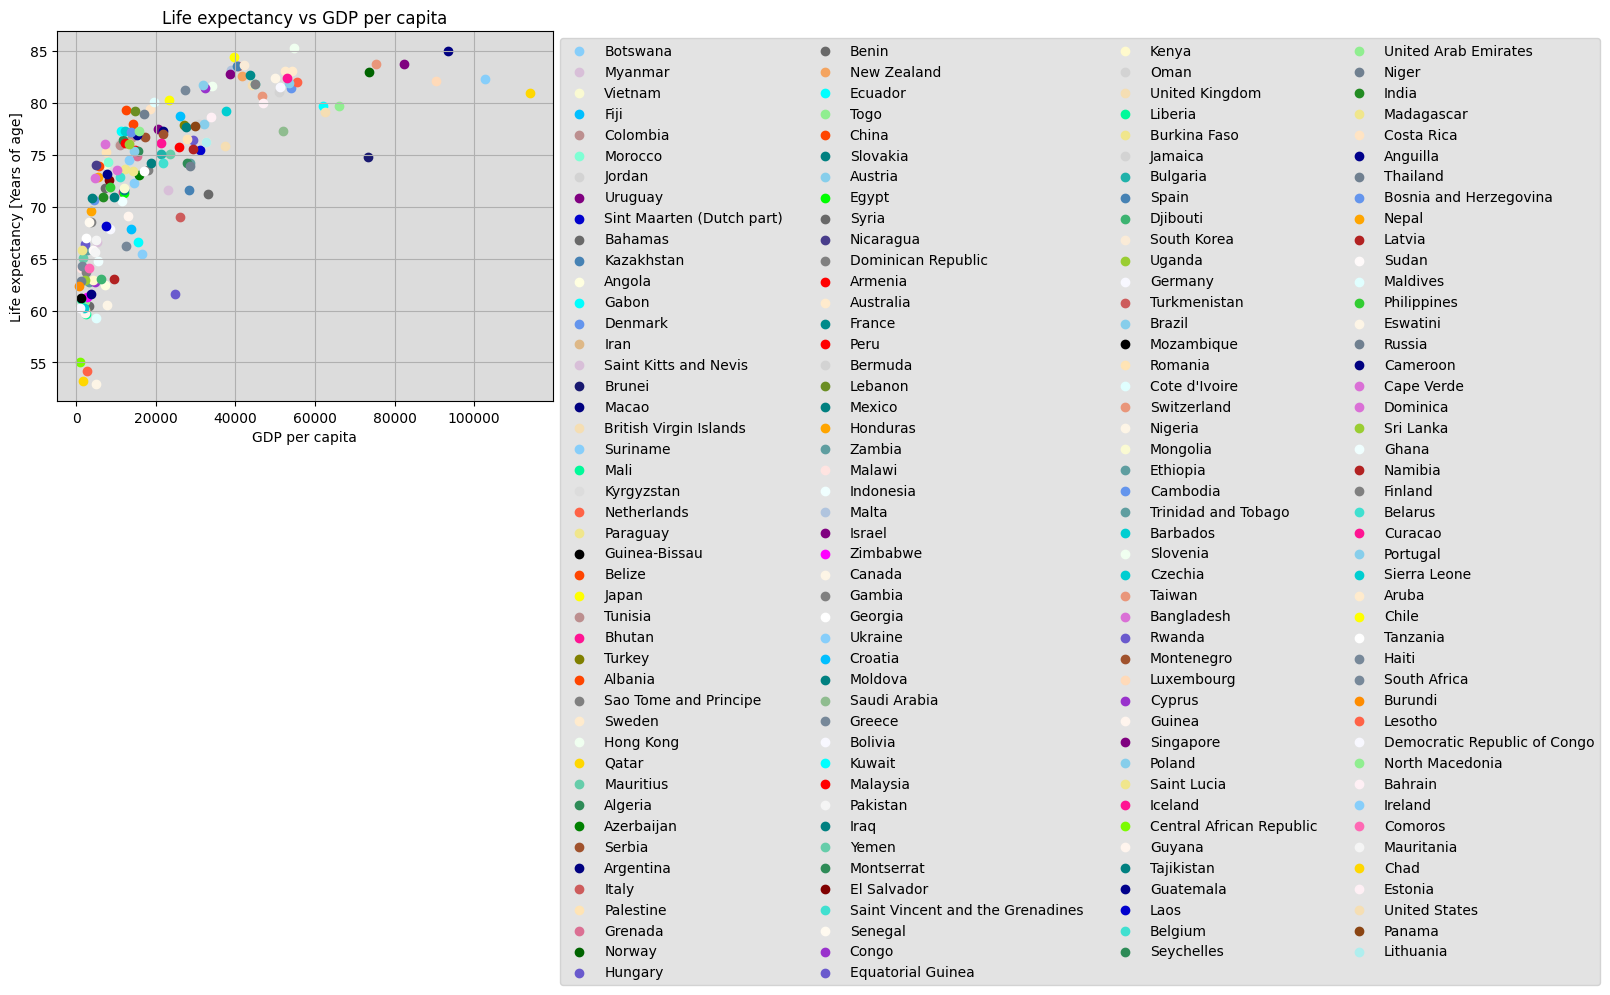

In [83]:
#Scatter plot Life expectancy vs. GDP per capita

year= [2019] #Visable year in graph

df = pd.read_csv("life-expectancy.csv", on_bad_lines='skip')
df_year = df[df['Year'].isin(year)] #Life expectancy for chosen year

df2 = pd.concat([pd.read_csv("gdp-per-capita-penn-world-table.csv")])
df2_year = df2[df2['Year'].isin(year)] #GDP for chosen year

#Finding which countries has both data types
olC = set(df_year['Entity']) & set(df2_year['Entity'])
#Life expectancy list for joint countries
dfc = df_year[df_year['Entity'].isin(olC)]
#GDP list for joint countries
df2c = df2_year[df2_year['Entity'].isin(olC)]

 #TShows mean life expectancy
print(dfc.describe())
#Shows mean GDP per capita
print(df2c.describe())

xValues = df2c['GDP per capita (output, multiple price benchmarks)']
yValues = dfc['Period life expectancy']

ax = plt.axes()
ax.set_facecolor('#DCDCDC') #color of graph
plt.grid(True)              #grid on

#scatterplot with joint variable countries combining life expectancy to gdp from the two data sets
for i, entity in enumerate(olC):
    x = df2c[df2c['Entity'] == entity]['GDP per capita (output, multiple price benchmarks)']
    y = dfc[dfc['Entity'] == entity]['Period life expectancy']
    color = random.choice(list(mcolors.CSS4_COLORS.keys()))   #Random color choice from the CSS4 hex-list

    plt.scatter(x, y, color=color, label=entity)

plt.title('Life expectancy vs GDP per capita')
plt.xlabel('GDP per capita')
plt.ylabel('Life expectancy [Years of age]')
legend = plt.legend(loc='upper left', bbox_to_anchor=(1, 1), ncol = 4)
legend.get_frame().set_facecolor('#DCDCDC')
plt.show()



# 1. Which countries have a life expectancy higher than one standard deviation above the mean?

In [76]:

# Loading data from the CSV file, skipping lines with too many fields
df = pd.read_csv("life-expectancy.csv", on_bad_lines='skip')

# Filtering the data for the years 2019
filtered_df = df[df['Year'] == 2019]

# Calculating the mean, standard deviation and life expectancy higher than one standard deviation above the mean of 'Period life expectancy' for 2019
LE_mean = filtered_df['Period life expectancy'].mean()
LE_std = filtered_df['Period life expectancy'].std()
one_std_above_mean = LE_mean + LE_std

# Displaying mean, standard deviation and life expectancy higher than one standard deviation above the mean
display("Mean", LE_mean)
display("Standard deviation", LE_std)
display("one standard deviation above mean", one_std_above_mean)

'Mean'

73.40906725490196

'Standard deviation'

7.263052244502606

'one standard deviation above mean'

80.67211949940456

In [78]:
# Loading data from the CSV file, skipping lines with too many fields
df = pd.read_csv("life-expectancy.csv", on_bad_lines='skip')

# Filtering the data for the years 2019
filtered_df = df[df['Year'] == 2019]

# Calculating the mean and standard deviation of 'Period life expectancy' for 2019
LE_mean = filtered_df['Period life expectancy'].mean()
LE_std = filtered_df['Period life expectancy'].std()

# Filtering the data for life expectancy higher than one standard deviation above the mean
Life_Expectancy = filtered_df[filtered_df['Period life expectancy'] > (LE_mean + LE_std)]

# Saving the filtered data to a new CSV file
Life_Expectancy.to_csv('life_expectancy_above_mean.csv', index=False)

# Displaying the countries with life expectancy higher than one standard deviation above the mean
display(Life_Expectancy)


,Entity,Code,Year,Period life expectancy
512,Andorra,AND,2019,83.0039
1137,Australia,AUS,2019,83.1100
1215,Austria,AUT,2019,81.9077
1836,Belgium,BEL,2019,81.8311
2052,Bermuda,BMU,2019,81.0334
3113,Canada,CAN,2019,82.3628
4319,Cyprus,CYP,2019,81.3970
4661,Denmark,DNK,2019,81.4337
6107,Finland,FIN,2019,81.8706
6326,France,FRA,2019,82.7315


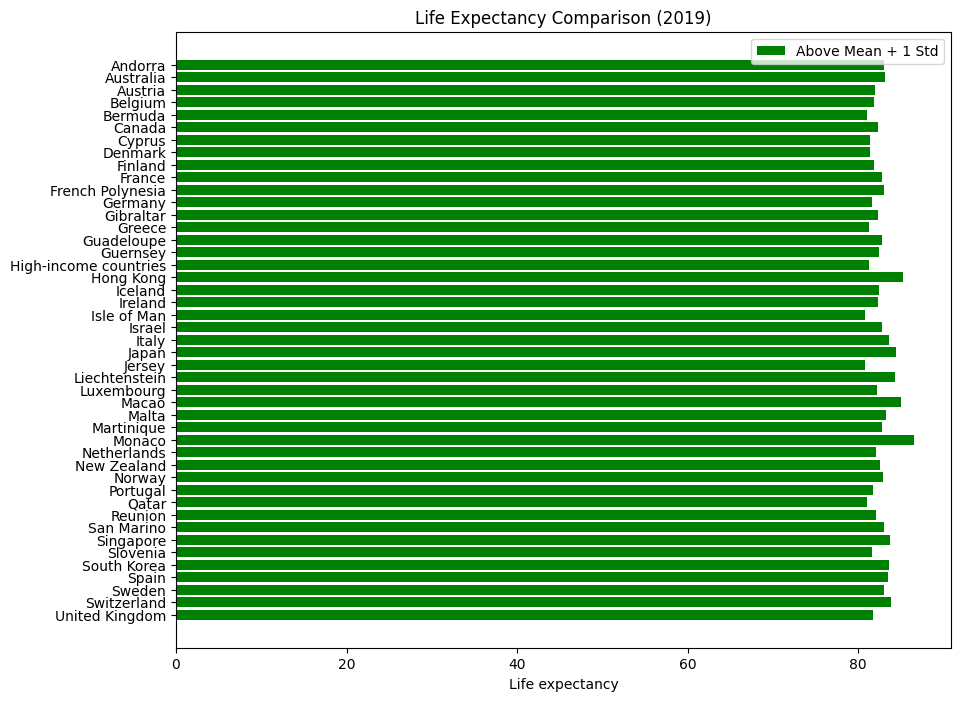

In [79]:
# Loading data from the CSV file, skipping lines with too many fields
df = pd.read_csv("life-expectancy.csv", on_bad_lines='skip')
df= df.dropna(subset =['Period life expectancy'])

# Filtering the data for the years 2019
filtered_df = df[df['Year'] == 2019]

# Calculating the mean and standard deviation of 'Life expectancy' for 2019
LE_mean = filtered_df['Period life expectancy'].mean()
LE_std = filtered_df['Period life expectancy'].std()

# Filtering the data for life expectancy higher than one standard deviation above the mean
above_mean_std = filtered_df[filtered_df['Period life expectancy'] > (LE_mean + LE_std)]

# Ordering the data by life expectancy
above_one_std = above_mean_std.sort_values(by='Period life expectancy', ascending=False)

# Creating a bar chart to visualize the data
plt.figure(figsize=(10, 8))
plt.barh(above_mean_std['Entity'], above_mean_std['Period life expectancy'], color='green', label='Above Mean + 1 Std')
plt.xlabel('Life expectancy')
plt.title('Life Expectancy Comparison (2019)')
plt.legend()
plt.gca().invert_yaxis()  # Invert the y-axis for better visualization
plt.show()

# 2.

         Year  Period life expectancy
count   178.0              178.000000
mean   2019.0               73.047554
std       0.0                7.519209
min    2019.0               52.910400
25%    2019.0               67.201625
50%    2019.0               74.249200
75%    2019.0               78.720525
max    2019.0               85.273500
         Year  GDP (output, multiple price benchmarks)
count   178.0                             1.780000e+02
mean   2019.0                             7.013605e+11
std       0.0                             2.356838e+12
min    2019.0                             7.769418e+07
25%    2019.0                             2.809709e+10
50%    2019.0                             9.305522e+10
75%    2019.0                             4.616077e+11
max    2019.0                             2.059584e+13


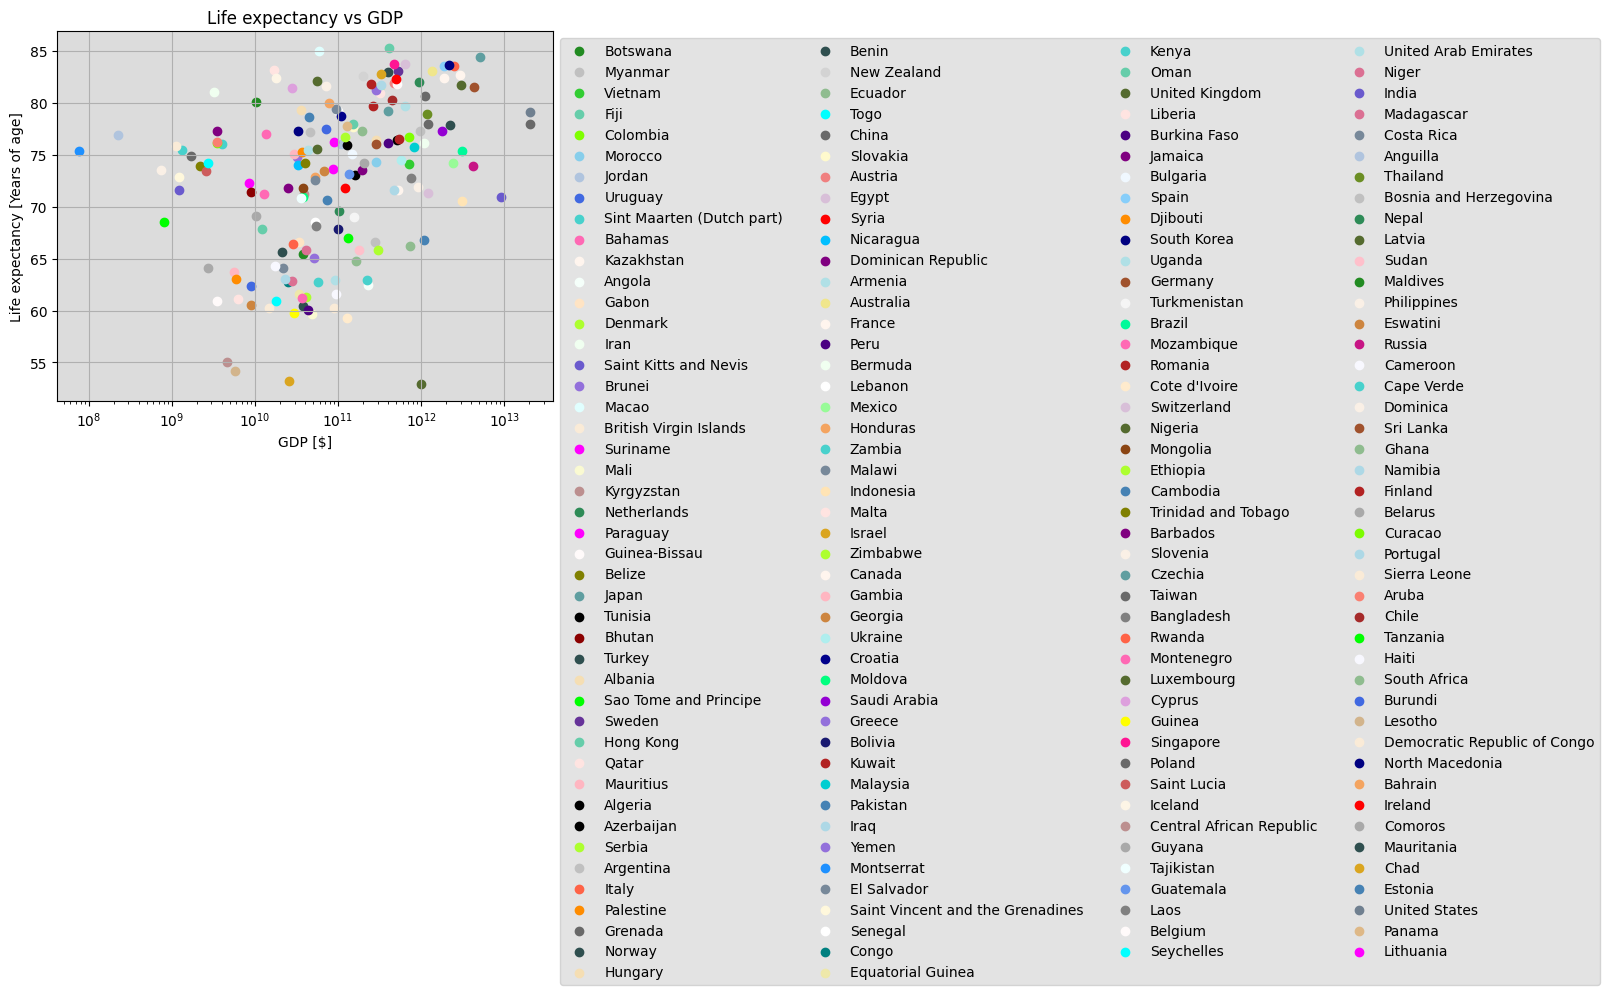

In [82]:
# Task 2

year= [2019] #Visable year in graph

df = pd.read_csv("life-expectancy.csv", on_bad_lines='skip')
df_year = df[df['Year'].isin(year)] #Life expectancy for chosen year

df2 = pd.concat([pd.read_csv("national-gdp-penn-world-table.csv")])
df2_year = df2[df2['Year'].isin(year)] #GDP for chosen year

#Finding which countries has both data types
olC = set(df_year['Entity']) & set(df2_year['Entity'])
#Life expectancy list for joint countries
dfc = df_year[df_year['Entity'].isin(olC)]
#GDP list for joint countries
df2c = df2_year[df2_year['Entity'].isin(olC)]

 #TShows mean life expectancy
print(dfc.describe())
#Shows mean GDP
print(df2c.describe())

XValues = df2c['GDP (output, multiple price benchmarks)']
YValues = dfc['Period life expectancy']

ax = plt.axes()
ax.set_facecolor('#DCDCDC') #color of graph
plt.grid(True)              #grid on

#scatterplot with joint variable countries combining life expectancy to gdp from the two data sets
for i, entity in enumerate(olC):
    x = df2c[df2c['Entity'] == entity]['GDP (output, multiple price benchmarks)']
    y = dfc[dfc['Entity'] == entity]['Period life expectancy']
    color = random.choice(list(mcolors.CSS4_COLORS.keys()))   #Random color choice from the CSS4 hex-list

    plt.scatter(x, y, color=color, label=entity)

plt.title('Life expectancy vs GDP')
plt.xlabel('GDP [$]')
plt.ylabel('Life expectancy [Years of age]')
plt.xscale('log')
legend = plt.legend(loc='upper left', bbox_to_anchor=(1, 1), ncol = 4)
legend.get_frame().set_facecolor('#DCDCDC')
plt.show()



# 3.

In [84]:
# Comptute the Pearson correlation coefficient for Question 3
PCC = np . corrcoef ( XValues , YValues ) [0 , 1]
print ( " Pearson correlation coefficient : " , PCC)

 Pearson correlation coefficient :  0.17341424670475897


# 4.

In [85]:
# Comptute the Pearson correlation coefficient for Question 4
PCC = np . corrcoef ( xValues , yValues ) [0 , 1]
print ( " Pearson correlation coefficient : " , PCC)

 Pearson correlation coefficient :  0.7111851058514853
